## Ease of Movement

Ease of Movement (EMV) 지표는 리처드 W. 암스 주니어에 의해 개발된 기술적 분석 도구로, 주식이나 다른 자산의 가격 이동이 얼마나 쉽게 이루어지고 있는지를 측정하는 데 사용된다. 이 지표는 가격 변동과 거래량을 결합하여, 자산의 가격 변동이 얼마나 "편하게" 이루어지는지를 평가한다.

Ease of Movement의 계산은 다음과 같이 이루어진다:

1. 각 거래일의 중간가격의 변화량을 계산한다

$$\Delta M_t = \frac{H_t + L_t}{2} - \frac{H_{t-1} + L_{t-1}}{2}$$

2. 거래량 비율(Box ratio)을 계산한다.

$$\mbox{Box ratio}_t = \frac{V_t}{H_t - L_t}$$

이 비율은 거래량을 그 날의 가격 범위로 나눈 것이다.

3. Ease of Movement 값은 Midpoint Move를 Box Ratio로 나눈 값으로 계산된다

$$\mbox{EoM}_t = \frac{\Delta M_t}{\mbox{Box ratio}_t}$$

결과적으로, EMV 값이 크고 긍정적이면, 자산의 가격 이동이 크고 거래량이 상대적으로 적을 때 발생하며, 이는 가격 이동이 "편하게" 이루어지고 있다는 신호이다. 

반대로, EMV 값이 작거나 음수이면, 가격 이동이 미미하거나 거래량이 많은 상황을 나타내며, 이는 가격 이동이 "어렵게" 이루어지고 있다는 것을 의미한다.

일반적으로 EMV 지표는 이동 평균을 적용하여 부드럽게 하여 사용한다. 예를 드어, 14일 이동 평균을 적용한 EMV는 중기적인 추세를 더 명확하게 보여줄 수 있다. 이 지표는 추세의 방향과 강도를 이해하는 데 유용하게 사용될 수 있다.

`ta` library에서는 총 두 개의 EoM함수를 제공한다. 지수가중이동평균값을 이용한 함수는 `ease_of_movement`이며, `sma_ease_of_movement`는 단순 이동평균선을 사용한 값이다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import ease_of_movement, sma_ease_of_movement
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [2]:
eom_ewm = ease_of_movement(
    high = data['High'],
    low = data['Low'],
    volume = data['Volume'],
    window = 14,
    fillna = False
)

In [3]:
eom_sma = sma_ease_of_movement(
    high = data['High'],
    low = data['Low'],
    volume = data['Volume'],
    window = 14,
    fillna = False
)

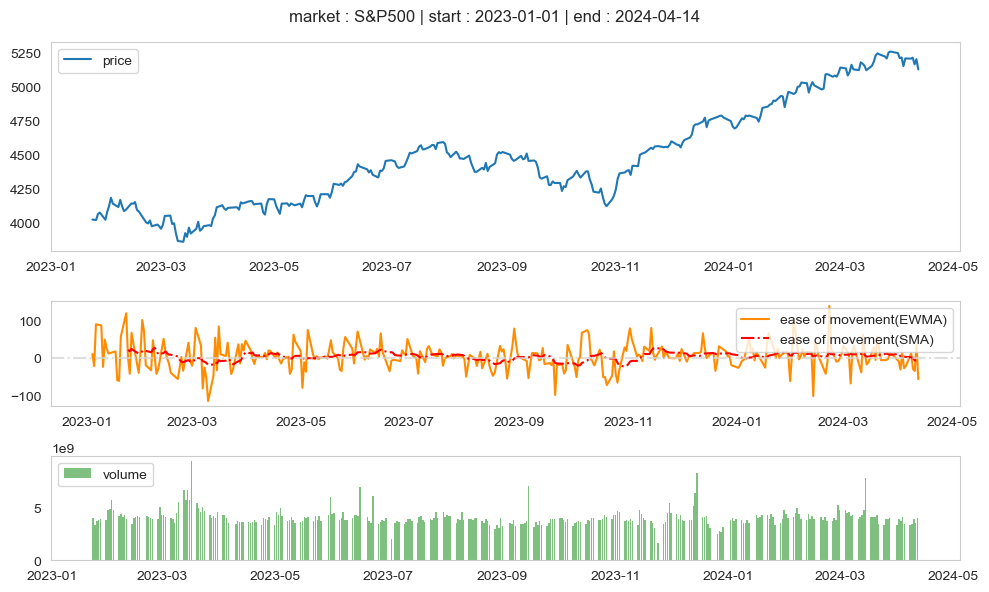

In [11]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'][13:])
plt.grid(False)
plt.legend(['price'])

plt.subplot(gs[1])
plt.plot(eom_ewm, color = 'darkorange')
plt.plot(eom_sma, color = 'red', ls = '-.')
plt.grid(False)
plt.axhline(y = 0, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['ease of movement(EWMA)', 'ease of movement(SMA)'])

plt.subplot(gs[2])
plt.bar(data['Volume'][13:].index, data['Volume'][13:], color = 'green', edgecolor = 'none', alpha = 0.5)
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()

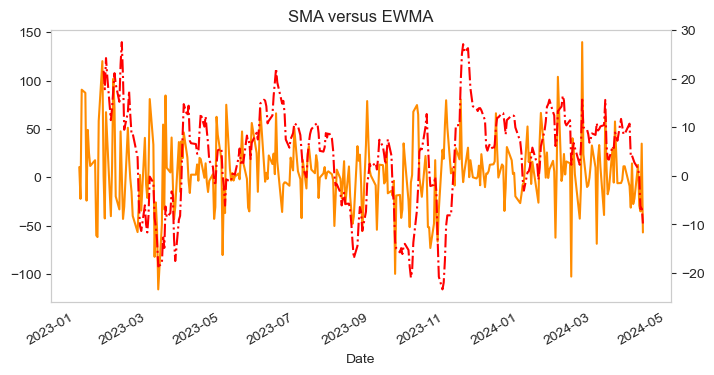

In [15]:
plt.figure(figsize = (8,4))
plt.plot(eom_ewm, color = 'darkorange')
plt.grid(False)
eom_sma.plot(secondary_y = True, color = 'red', ls = '-.')
plt.grid(False)
plt.title('SMA versus EWMA')
plt.show()